In [1]:
##Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt 
import plotly.offline as py
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV, KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score,recall_score,precision_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_selection import SelectFromModel
import time             

In [2]:
## For ignoring warnings to view clean output
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
## Importing the dataset
data = pd.read_csv('Data/cleaned.csv',header=0)

In [4]:
### Separating Independent and Dependent features
X = data.iloc[:,:-1]
y = data.iloc[:, 14]

### Data Transformation
#### Handling Categorical Variables - Creating Dummy Variables

In [5]:
# Shows the columns with their number of categories each variable is having
for col in data.columns:
    print(col, ':', len(data[col].unique()), 'categories')

Age_band_of_driver : 5 categories
Sex_of_driver : 3 categories
Educational_level : 7 categories
Vehicle_driver_relation : 4 categories
Driving_experience : 8 categories
Lanes_or_Medians : 7 categories
Types_of_Junction : 8 categories
Road_surface_type : 6 categories
Light_conditions : 4 categories
Weather_conditions : 9 categories
Type_of_collision : 10 categories
Vehicle_movement : 13 categories
Pedestrian_movement : 9 categories
Cause_of_accident : 20 categories
Accident_severity : 3 categories


In [5]:
pd.get_dummies(data,drop_first=True).shape

(12316, 100)

In [5]:
X = pd.get_dummies(X, drop_first=True)

In [7]:
X.shape

(12316, 99)

### Handling Class imbalance

In [8]:
### Checking for data imbalance 
y.value_counts()

2    10415
1     1743
0      158
Name: Accident_severity, dtype: int64

In [9]:
print('Slight Injury: ' + str(round(data['Accident_severity'].value_counts()[2] / len(data) * 100, 2)) + '%\nSerious Injury: ' + 
      str(round(data['Accident_severity'].value_counts()[1] / len(data) * 100, 2))  + '%\nFatal Injury: ' + 
      str(round(data['Accident_severity'].value_counts()[0] / len(data) * 100, 2)) + '%')

Slight Injury: 84.56%
Serious Injury: 14.15%
Fatal Injury: 1.28%


#### SMOTE Oversampling Techniques for handling imbalanced dataset

In [6]:
# Oversampling
sm = SMOTE(random_state=0)
X_over, y_over = sm.fit_sample(X, y)
## train test split
X_train_over,X_test_over,y_train_over,y_test_over = train_test_split(X_over,y_over,test_size=0.2,random_state=42)
#setting 20% aside as validation data for cross validation
x_train_t, x_train_v, y_train_t, y_train_v = train_test_split(X_train_over, y_train_over, test_size = 0.2, random_state = 42)

In [11]:
# Print class frequencies 
pd.Series(y_over).value_counts()

2    10415
1    10415
0    10415
Name: Accident_severity, dtype: int64

In [12]:
# print the shapes of our training and test set 
print(X_train_over.shape)
print(X_test_over.shape)
print(y_train_over.shape)
print(y_test_over.shape)

(24996, 99)
(6249, 99)
(24996,)
(6249,)


In [13]:
y_test_over.value_counts()

1    2100
0    2085
2    2064
Name: Accident_severity, dtype: int64

In [18]:
start_time = time.time()
#Setting values for the parameters
n_estimators = [100, 300, 500, 800, 1000]
criterion = ['gini','entropy']
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
max_features = ['auto','log2','sqrt']

#Creating a dictionary for the hyper parameters
parameters = dict(n_estimators = n_estimators, criterion =criterion, max_depth = max_depth, 
              min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, max_features = max_features)
cv = KFold(n_splits= 5, shuffle=False, random_state=42)
RF_model = RandomForestClassifier()
grid_RF_model = GridSearchCV(RF_model, parameters, cv = cv, scoring='f1_macro', verbose = 1, n_jobs = -1)

# feeding the training data into the model
best_RF= grid_RF_model.fit(X_train_over, y_train_over)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 58.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 90.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 147.3min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 214.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 309.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 418.3min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 562.9min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 718.6min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 884.8min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 1006.2min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 1157.7min
[Parallel(n_jobs=-1)]: Done 11242 t

Execution time: 149796.46750068665 sec


In [19]:
#Printing the best hyperparameters
print('The best hyper parameters are:\n',grid_RF_model.best_params_)

The best hyper parameters are:
 {'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


### Feature selection using Random Forest Classifier using the best hyperparameter 

In [7]:
#Fitting the random forest model with the best hyper parameters obtained 
start_time = time.time()
RF_model = RandomForestClassifier(criterion ='gini',max_depth=30,max_features='log2',min_samples_leaf=1, min_samples_split=5, n_estimators=500)
RF_model.fit(X_train_over,y_train_over)
y_pred_h = RF_model.predict(X_test_over)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 20.9846670627594 sec


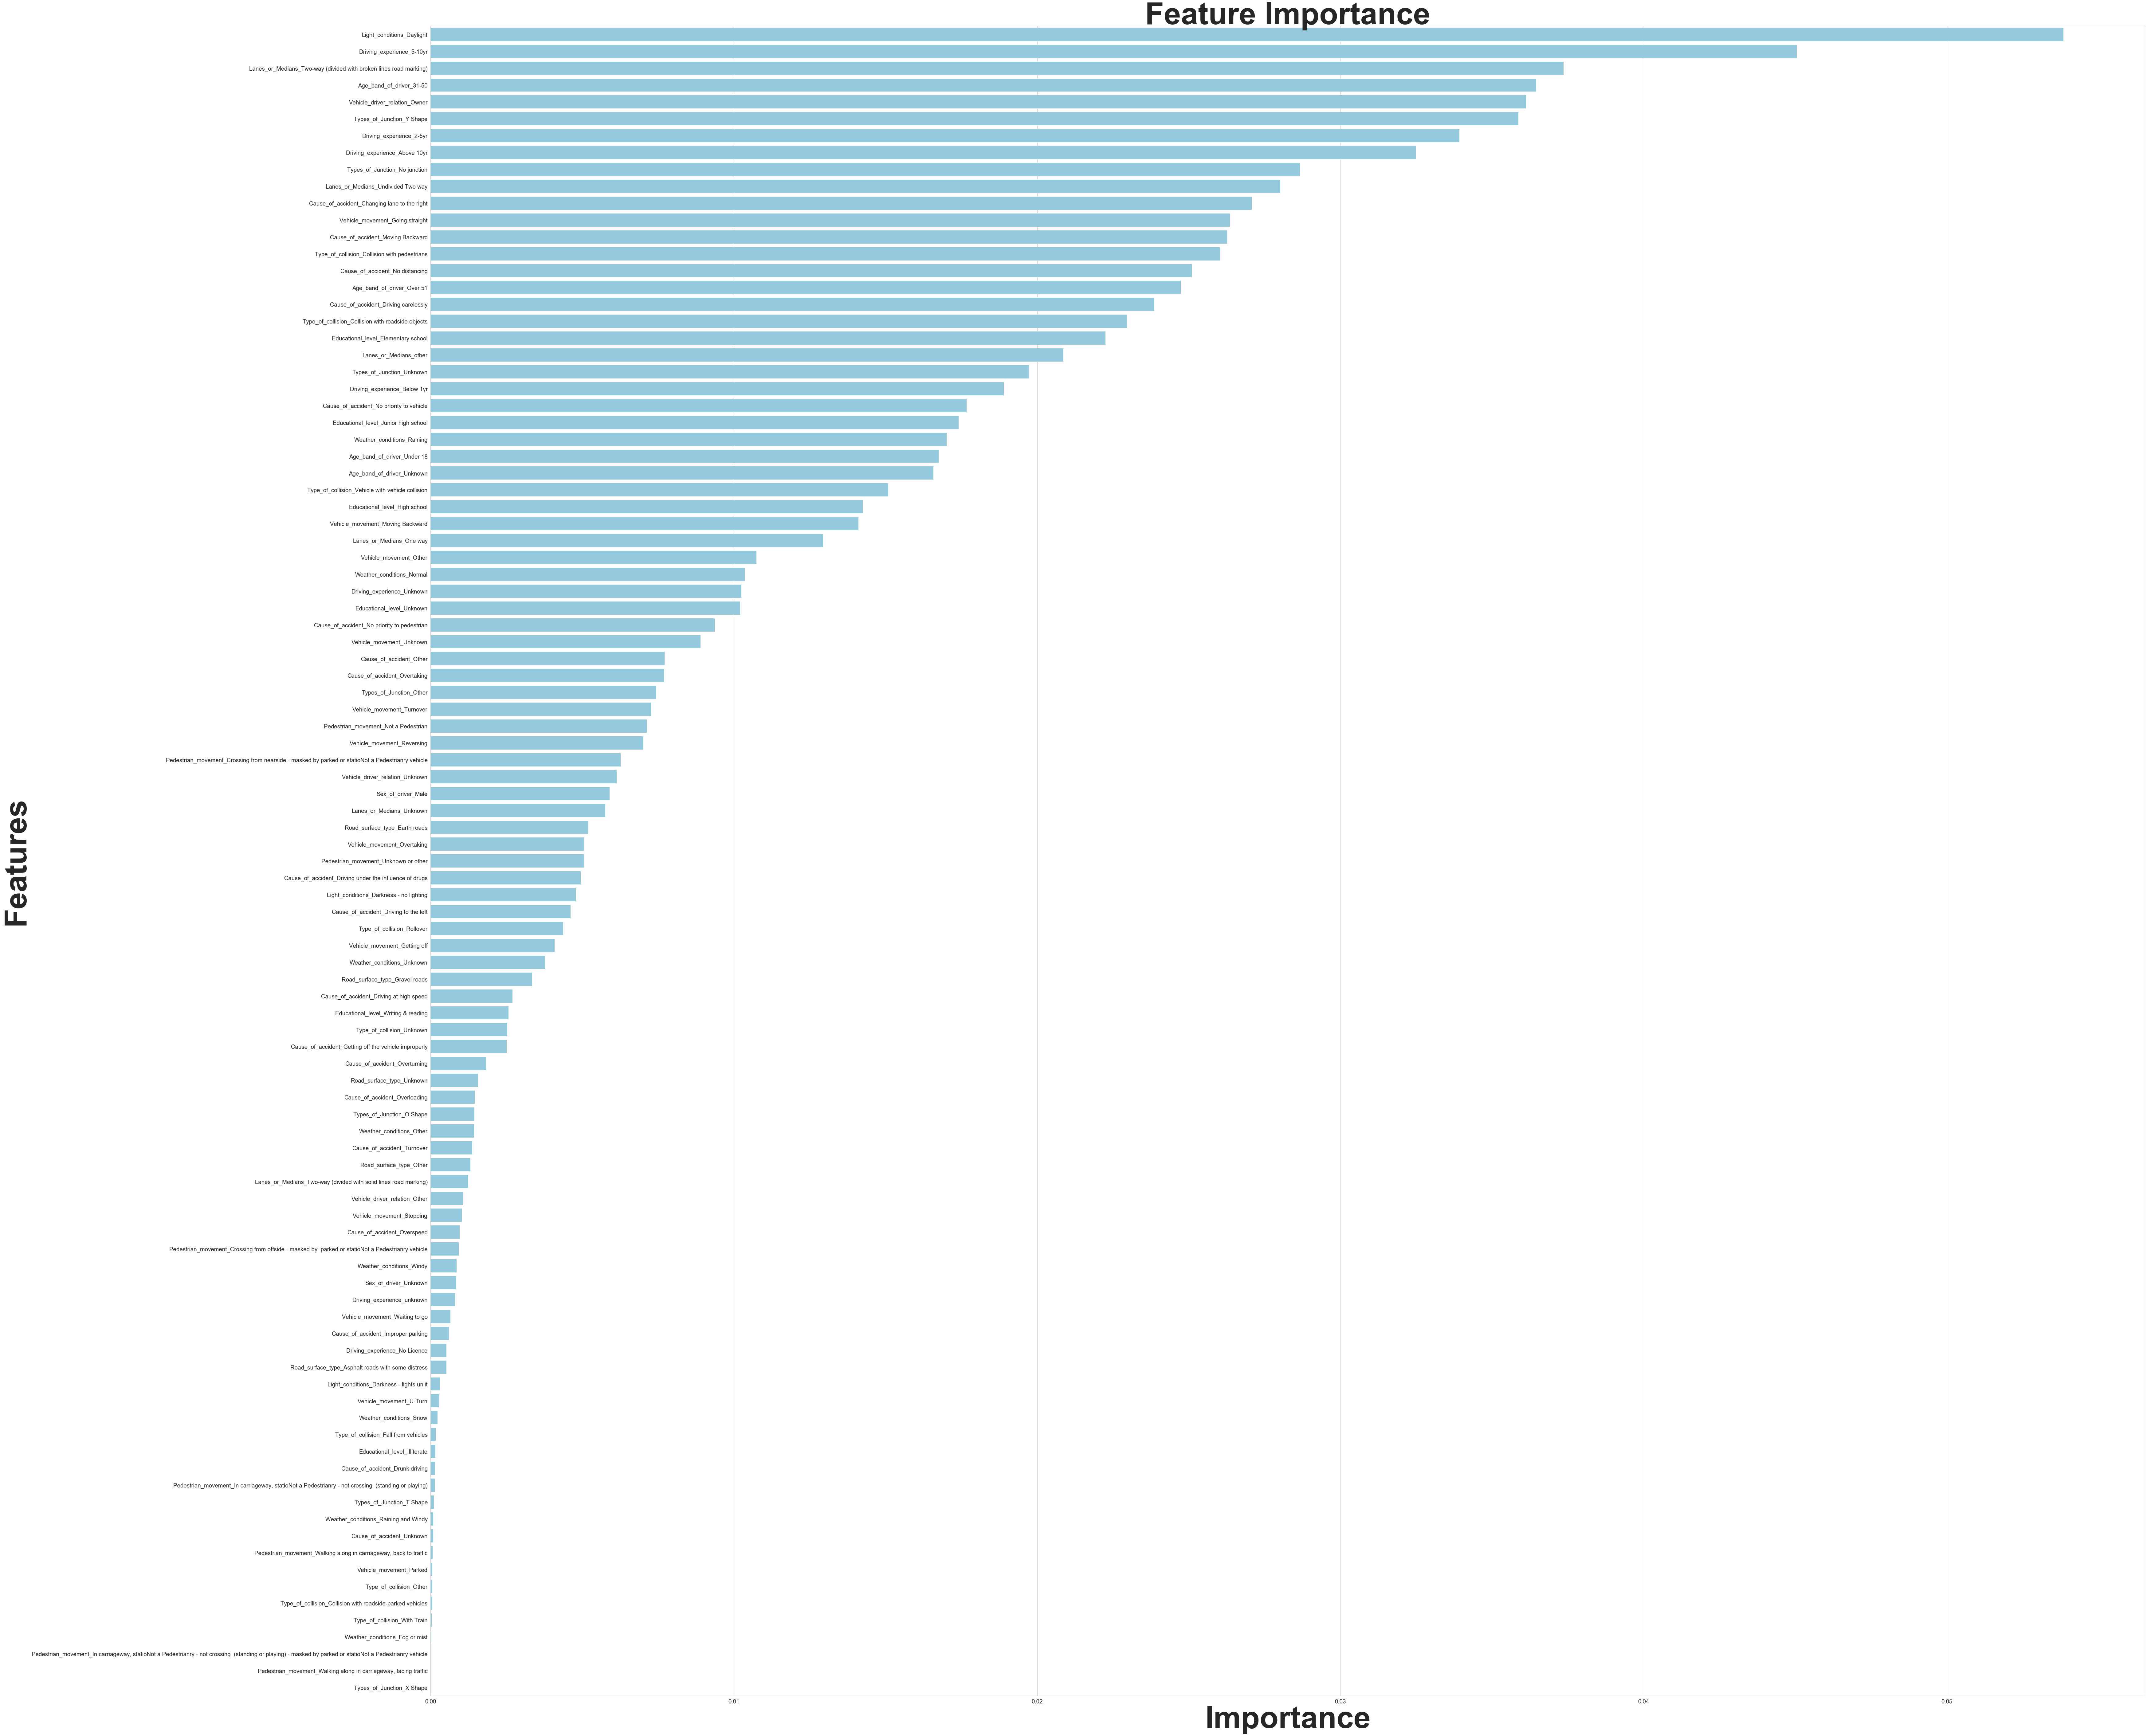

None

In [11]:
feats = {}
for feature, importance in zip(X.columns, RF_model.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 25)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(100,100)
sns.barplot(x=importances['Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=100, weight = 'bold')
plt.ylabel('Features', fontsize=100, weight = 'bold')
plt.title('Feature Importance', fontsize= 100, weight = 'bold')
display(plt.show())

In [13]:
feature_results = pd.DataFrame({'Features': list(X.columns), 
                                'Importance Score': RF_model.feature_importances_})

# Show the top 15 most important features
feature_results = feature_results.sort_values('Importance Score', ascending = False).reset_index(drop=True)
feature_results.head(15)

,Features,Importance Score
0,Light_conditions_Daylight,0.053837
1,Driving_experience_5-10yr,0.045049
2,Lanes_or_Medians_Two-way (divided with broken ...,0.037359
3,Age_band_of_driver_31-50,0.036453
4,Vehicle_driver_relation_Owner,0.036124
5,Types_of_Junction_Y Shape,0.035869
6,Driving_experience_2-5yr,0.033925
7,Driving_experience_Above 10yr,0.032481
8,Types_of_Junction_No junction,0.028667
9,Lanes_or_Medians_Undivided Two way,0.028013


In [20]:
# Show the top 10 less important features
feature_results.tail(10)

,Features,Importance Score
89,Cause_of_accident_Unknown,8.946254e-05
90,Pedestrian_movement_Walking along in carriagew...,6.829771e-05
91,Vehicle_movement_Parked,6.127883e-05
92,Type_of_collision_Other,5.679374e-05
93,Type_of_collision_Collision with roadside-park...,5.586073e-05
94,Type_of_collision_With Train,3.649512e-05
95,Weather_conditions_Fog or mist,1.269774e-05
96,"Pedestrian_movement_In carriageway, statioNot ...",4.940353e-07
97,Pedestrian_movement_Walking along in carriagew...,3.784001e-07
98,Types_of_Junction_X Shape,6.315785e-08


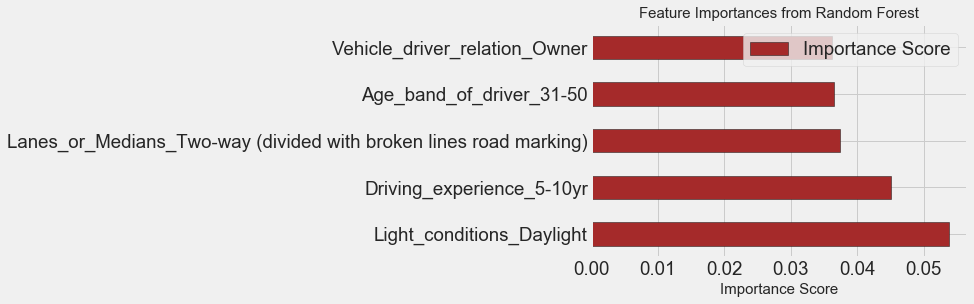

In [22]:
plt.style.use('fivethirtyeight')
# Plot the 5 most important features in a horizontal bar chart
feature_results.loc[:4, :].plot(x = 'Features', y = 'Importance Score', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'brown');
plt.xlabel('Importance Score', size = 15); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 15);

##### Conclusions:
From the above chart Daylight light condition, 5-10 years driving exprience, two way divided by broken line lane, 31-50 years of age band of driver and owner vehicle driver relationship features are the best five imortant features to build the model.